In [14]:
# 試試看 tiingo api 並畫圖
# google history stock
import os
import pandas_datareader as pdr

df = pdr.get_data_tiingo('GOOG', api_key='api_key')
df.head()

close      high       low    open   volume  \
symbol date                                                                     
GOOG   2016-05-23 00:00:00+00:00  704.24  711.4781  704.1800  706.53  1330692   
       2016-05-24 00:00:00+00:00  720.09  720.9700  706.8600  706.86  1929467   
       2016-05-25 00:00:00+00:00  725.27  727.5100  719.7047  720.76  1632564   
       2016-05-26 00:00:00+00:00  724.12  728.3300  720.2800  722.87  1576286   
       2016-05-27 00:00:00+00:00  732.66  733.9360  724.0000  724.01  1974962   

                                  adjClose   adjHigh    adjLow  adjOpen  \
symbol date                                                               
GOOG   2016-05-23 00:00:00+00:00    704.24  711.4781  704.1800   706.53   
       2016-05-24 00:00:00+00:00    720.09  720.9700  706.8600   706.86   
       2016-05-25 00:00:00+00:00    725.27  727.5100  719.7047   720.76   
       2016-05-26 00:00:00+00:00    724.12  728.3300  720.2800   722.87   
       2016-05-27 00:00:00+00:00    732.66  733.9360  724.0000   724.01   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2016-05-23 00:00:00+00:00    1330692      0.0          1.0  
       2016-05-24 00:00:00+00:00    1929467      0.0          1.0  
       2016-05-25 00:00:00+00:00    1632564      0.0          1.0  
       2016-05-26 00:00:00+00:00    1576286      0.0          1.0  
       2016-05-27 00:00:00+00:00    1974962      0.0          1.0

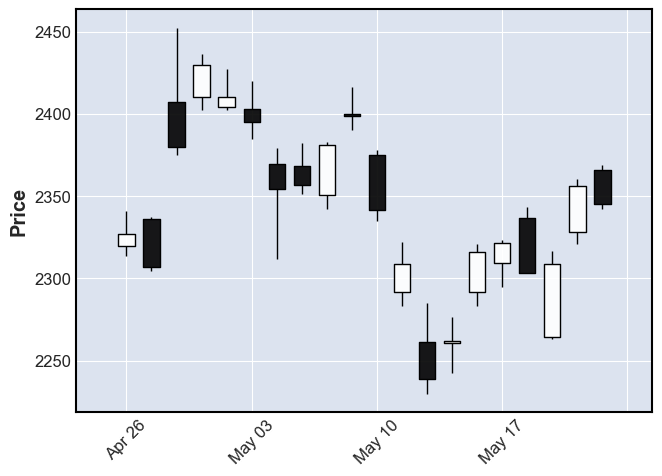

In [17]:
# draw chart

# 將multi-index轉成single-index
df1 = df.reset_index(level=[0,1])

# 指定date為index
df1.index = df1['date']

# 取adjClose至adjOpen的欄位資料  /adjClose~adjOpen/
df_adj = df1.iloc[:,7:11]

# 更改columns的名稱，以讓mplfinance看得懂
df_adj.columns = ['Close','High','Low','Open']

# 抓取近20日的資料
df_adj_20d = df_adj.iloc[-20:,:]

# 繪製K線圖
import mplfinance as mpf
mpf.plot(df_adj_20d, type='candle')

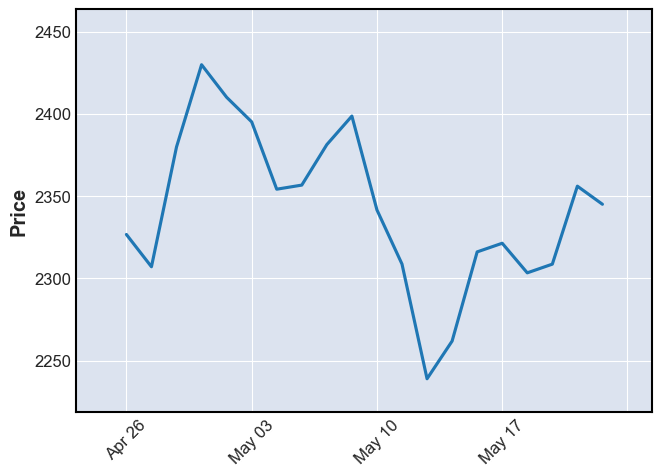

In [18]:
# 繪製線圖
mpf.plot(df_adj_20d,type='line')